In [2]:
from datasets import load_dataset, Dataset, concatenate_datasets
import json
import matplotlib.pyplot as plt
import numpy as np

c:\Users\thijs\miniconda3\envs\mallm\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ds = load_dataset("codeparrot/apps", "all")
print(ds)

DatasetDict({
    train: Dataset({
        features: ['problem_id', 'question', 'solutions', 'input_output', 'difficulty', 'url', 'starter_code'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['problem_id', 'question', 'solutions', 'input_output', 'difficulty', 'url', 'starter_code'],
        num_rows: 5000
    })
})


In [111]:
sample = ds['test'][1]
# print(ds['train'])
print(sample['question'])
print("\nSolutions: ", len(json.loads(sample['solutions'])))
print("ANSWER\n", json.loads(sample['solutions'])[4])
# # non-empty solutions and input_output features can be parsed from text format this way:
# sample["solutions"] = json.loads(sample["solutions"])
# sample["input_output"] = json.loads(sample["input_output"])
# print(sample)

Anton has the integer x. He is interested what positive integer, which doesn't exceed x, has the maximum sum of digits.

Your task is to help Anton and to find the integer that interests him. If there are several such integers, determine the biggest of them. 


-----Input-----

The first line contains the positive integer x (1 ≤ x ≤ 10^18) — the integer which Anton has. 


-----Output-----

Print the positive integer which doesn't exceed x and has the maximum sum of digits. If there are several such integers, print the biggest of them. Printed integer must not contain leading zeros.


-----Examples-----
Input
100

Output
99

Input
48

Output
48

Input
521

Output
499

Solutions:  25
ANSWER
 def sum_str(y):
    return sum(map(int, str(y)))


x = input()
length = len(x)
bad_answer = str(int(x[0]) - 1) + '9' * (length - 1) 
total = sum_str(bad_answer)


if length == 1 or sum_str(x) >= total:
    print(x)
else:
    for i in range(length - 1, 0, -1):
        new_total = 9 * (length - i)
   

In [112]:
i=0
save_num_of_solutions = []
for question in ds['test']:
    if len(question['solutions']) > 0:
        num_sol = len(json.loads(question['solutions']))
        save_num_of_solutions.append(num_sol)
    else:
        i+= 1
print("Number of questions without answer: ", i)

Number of questions without answer:  1235


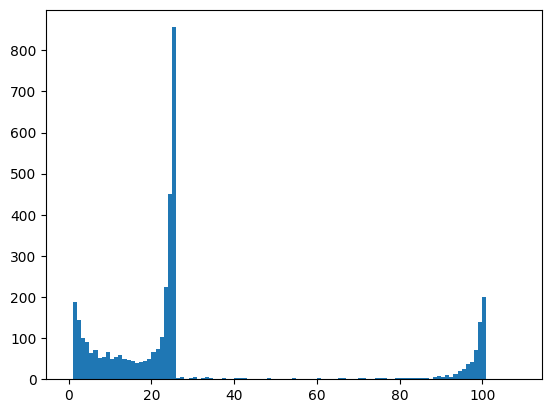

In [ ]:
y = np.asarray(save_num_of_solutions)
plt.hist(y, bins=range(0,110))
plt.show()

TRAIN

In [ ]:
questions = []
solutions = []
fulltexts = []
for problem in ds['train']:
    for solution in json.loads(problem['solutions']):
        questions.append("" + problem['question'] + "")
        solutions.append(solution)
        fulltext = "<s>[INST] " + problem['question'] + " [/INST]\n" + solution + " </s>\n"
        print(fulltext)
        break
    break

<s>[INST] Polycarp has $n$ different binary words. A word called binary if it contains only characters '0' and '1'. For example, these words are binary: "0001", "11", "0" and "0011100".

Polycarp wants to offer his set of $n$ binary words to play a game "words". In this game, players name words and each next word (starting from the second) must start with the last character of the previous word. The first word can be any. For example, these sequence of words can be named during the game: "0101", "1", "10", "00", "00001".

Word reversal is the operation of reversing the order of the characters. For example, the word "0111" after the reversal becomes "1110", the word "11010" after the reversal becomes "01011".

Probably, Polycarp has such a set of words that there is no way to put them in the order correspondent to the game rules. In this situation, he wants to reverse some words from his set so that:  the final set of $n$ words still contains different words (i.e. all words are unique);

In [119]:
train_set = Dataset.from_dict({"text":questions, "code":solutions})

In [121]:
# train_set['text']
train_set

Dataset({
    features: ['text', 'code'],
    num_rows: 117232
})

In [117]:
train_set.save_to_disk("apps_train.hf")

Saving the dataset (0/1 shards):   0%|          | 0/117232 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 117232/117232 [00:00<00:00, 211448.17 examples/s]


TEST

In [3]:
questions = []
inputs = []
outputs = []

n_inputs = []
n_outputs = []
for problem in ds['test']:
    questions.append(problem['question'])
    input = json.loads(problem['input_output'])['inputs']
    output = json.loads(problem['input_output'])['outputs']
    inputs.append(input)
    outputs.append(output)

    n_inputs.append(len(input))
    n_outputs.append(len(output))

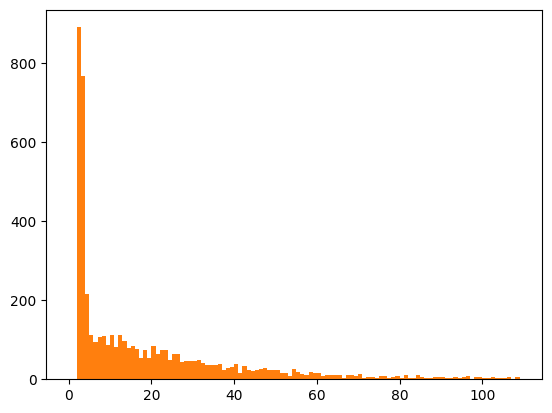

In [ ]:
plt.hist(np.asarray(n_inputs), bins=range(0,110))
plt.show()
# print(inputs[0])

In [14]:
for input_series in inputs:
    for input in input_series:
        if not isinstance(input[0], str):
            print(input[0])
# print([["a a a" for i in range(3)] for i in range(5000)])

[1, 2, 3]
[0, 1]
[1]
3
3
9
[3, 2, 3]
[1]
[1, 2]
[1, 5, 3, 6, 7]
[1, 5, 3, 6, 7]
[1, 5, 3, 6, 7]
[['1', '0', '1', '0', '0'], ['1', '0', '1', '1', '1'], ['1', '1', '1', '1', '1'], ['1', '0', '0', '1', '0']]
[['0', '0']]
2
1
3
1
[[0, 0, 0], [0, 1, 0], [0, 0, 0]]
[[0, 1], [0, 0]]
2
2
[[1, 3, 1], [1, 5, 1], [4, 2, 1]]
[[1, 2, 3], [4, 5, 6]]
[[-2, -3, 3], [-5, -10, 1], [10, 30, -5]]
[[0]]
[1, 2, 3]
[0]
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]]
[[2, 9, 10], [3, 7, 15], [5, 12, 12], [15, 20, 10], [19, 24, 8]]
[[0, 2, 3], [2, 5, 3]]
[1, 1, 2]
[1, 2, 3]
[[2], [3, 4], [6, 5, 7], [4, 1, 8, 3]]
[[-10]]
[1, 2, 2]
[0]
[5, 7, 7, 8, 8, 10]
[5, 7, 7, 8, 8, 10]
[]
3
1
[[1, 3], [2, 6], [8, 10], [15, 18]]
[[1, 4], [4, 5]]
[[10, 1, 2, 7, 6, 1, 5]]
[[2, 5, 2, 1, 2]]
[[1, 3], [6, 9]]
[[1, 2], [3, 5], [6, 7], [8, 10], [12, 16]]
[-2, 3, 4]
[4, 2, 3]
[3, -1, 0, 2]
[2, -3, -1, 5, -4]
[0, 2, 3, -3, 3, -4, 5, 6, 8, 8, 9]
[0, 2, 1, -6, 6, 7, 9, -1, 2, 0, 1]
[0, 2, 1, -6, 6, -7, 

In [10]:
dic = {"text":questions, "inputs":str(inputs), "outputs":str(outputs)}
# dic_df = pd.DataFrame.from_dict(dic)
inp = [["a a a" for i in range(3)] for j in range(5000)]
testdic = {"text":questions, "inputs":inp}
test_set = Dataset.from_dict(dic)
# Dataset.Features

ArrowInvalid: Column 1 named inputs expected length 5000 but got length 985040116

In [118]:
dataset_cc = concatenate_datasets([train_set, train_set])
